# CLUSTERING ASSIGNMENT


## Problem statement :

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

The objective of this assignment is to categorise the countries using some socio-economic and health factors that determine the overall development of the country and to suggest the countries which the CEO needs to focus on the most.

**The below mentioned steps will be performed as part of this assignment**

1. Data reading 

2. Data preparation
    - Routine data check
    - Data quality check, missing value analysis and duplicate rows check
    - Data understanding ( Converting export,health,import which is given as percentage of gdp to their respective actual values.)
    
3. Data Visualisation and EDA

4. Outlier treatment and Hopkin's check

5. Scaling 

6. K-Means Clustering

7. Hierarchial Clustering

8. Country identification

# DATA READING

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
# read the dataset
country_df = pd.read_csv("Country-data.csv")
country_df.head() # printing first 5 rows and seeing whether dataset is read properly

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# DATA PREPARATION

## ROUTINE DATA CHECK

In [4]:
print(country_df.columns) ##inspecting the columns
print(country_df.shape) ##inspecting the shape
print(country_df.dtypes) ##inspecting the datatypes of variables
print(type(country_df)) ##inspecting the variable on country dataset.

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')
(167, 10)
country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object
<class 'pandas.core.frame.DataFrame'>


In [5]:
##further inspecting the datasets
print(country_df.info()) ##list down all the columns along with name ,no of non null values,datatype,memory usage
print(country_df.describe()) ##describe dataset's mean,std,min,25%,50%,75%,max

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300

## DATA QUALITY CHECK , MISSING VALUE ANALYSIS  AND DUPLICATE ROWS CHECK.

In [6]:
#Percentage of missing values in each column.
nullseries = round(country_df.isnull().sum() * 100 / len(country_df),2)
print(nullseries)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64


In [7]:
#Code for row-wise null count here
print(country_df.isnull().sum(axis=1))

0      0
1      0
2      0
3      0
4      0
      ..
162    0
163    0
164    0
165    0
166    0
Length: 167, dtype: int64


**There are no null values in the dataset.**

In [8]:
# Duplicates check

country_df.loc[country_df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


**There are no duplicate rows in the dataset.**

## DATA UNDERSTANDING

Converting export,health,import which is given as percentage of GDP to their respective actual values

In [9]:
## Converting export,health,import which is given as percentage of GDP to their respective actual
## values by multiplying with % with GDP .
country_df['exports']= (country_df['exports']* country_df['gdpp'])/100    
country_df['health'] = (country_df['health']* country_df['gdpp'])/100
country_df['imports']= (country_df['imports']* country_df['gdpp'])/100

In [10]:
country_df.head() # printing first 5 rows and seeing 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## DATA VISUALISATION

## EDA

In [11]:
country_df.dtypes  ##Checking datatype of variables again

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

## Univariate analysis for numerical columns

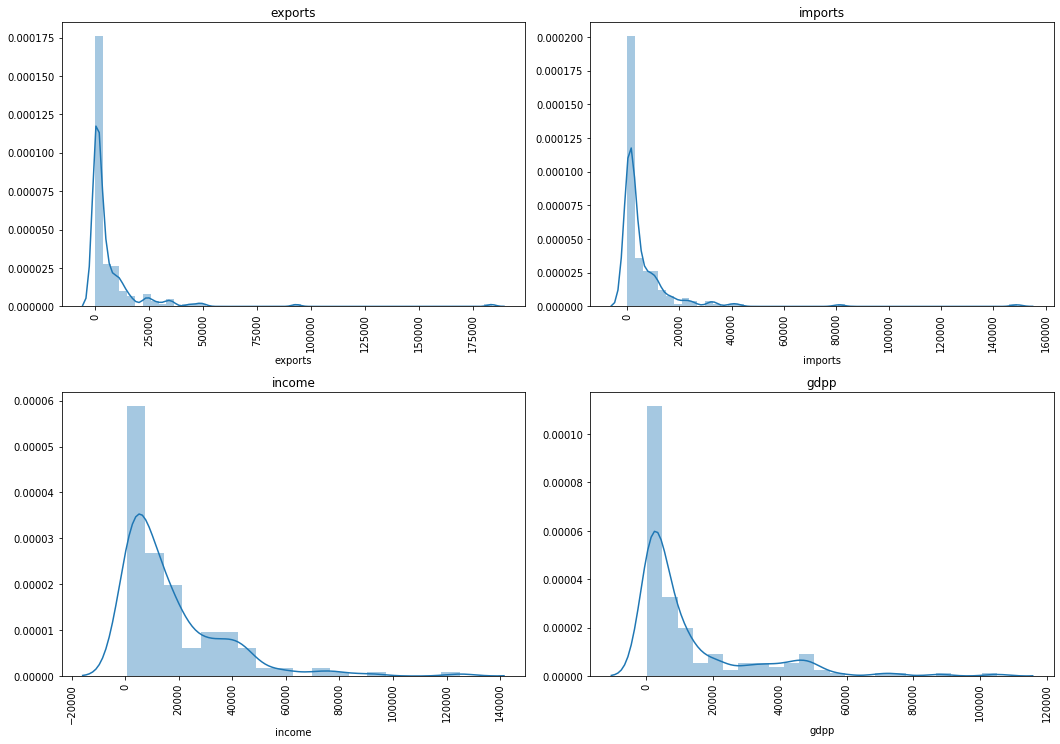

In [12]:
numerical_cols=['exports','imports','income','gdpp']

plt.figure(figsize = (15, 25))

for col in enumerate(numerical_cols):
    plt.subplot(5, 2, col[0]+1)
    plt.title(col[1])
    sns.distplot(country_df[col[1]], hist =True) #BLUE
    plt.tight_layout()
    plt.xticks(rotation = 90)

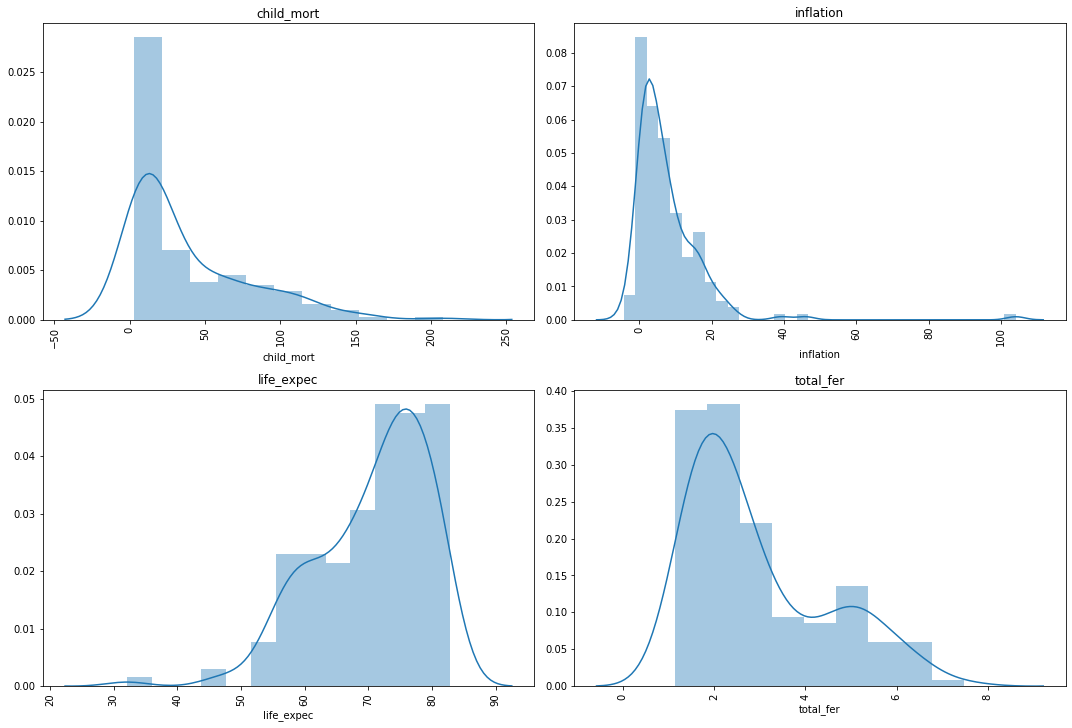

In [13]:
numerical_cols=['child_mort','inflation','life_expec','total_fer']

plt.figure(figsize = (15, 25))

for col in enumerate(numerical_cols):
    plt.subplot(5, 2, col[0]+1)
    plt.title(col[1])
    sns.distplot(country_df[col[1]], hist =True) #BLUE
    plt.tight_layout()
    plt.xticks(rotation = 90)

Inferences :

1. The average life expentancy is around 70 years.
2. The mean total_fer is around 3.

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 <a list of 7 Text xticklabel objects>)

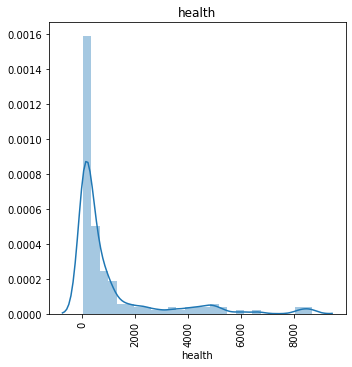

In [14]:

plt.figure(figsize = (5, 5))

plt.title('health')
sns.distplot(country_df['health'], hist =True) #BLUE
plt.tight_layout()
plt.xticks(rotation = 90)

Let's see describe the columns :

In [15]:
round(country_df.describe(),2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,7420.62,1056.73,6588.35,17144.69,7.78,70.56,2.95,12964.16
std,40.33,17973.89,1801.41,14710.81,19278.07,10.57,8.89,1.51,18328.70
min,2.60,1.08,12.82,0.65,609.00,-4.21,32.10,1.15,231.00
25%,8.25,447.14,78.54,640.21,3355.00,1.81,65.30,1.80,1330.00
50%,19.30,1777.44,321.89,2045.58,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,7278.00,976.94,7719.60,22800.00,10.75,76.80,3.88,14050.00
max,208.00,183750.00,8663.60,149100.00,125000.00,104.00,82.80,7.49,105000.00


Quick summary from the univariate analysis:

1. We can see that child mortality minimum value is 3(rounding 2.60) whereas it's maximum is 208 which is very high.
2. GDP is very low in few hundreds(231) for some country wheareas it's maximum is around 105000
3. The average life expentancy is around 70 years.
4. The mean total_fer is around 3.
5. The income per person varies as low as few hundreds to as high as lakhs

## Bivariate Analysis for numericals columns

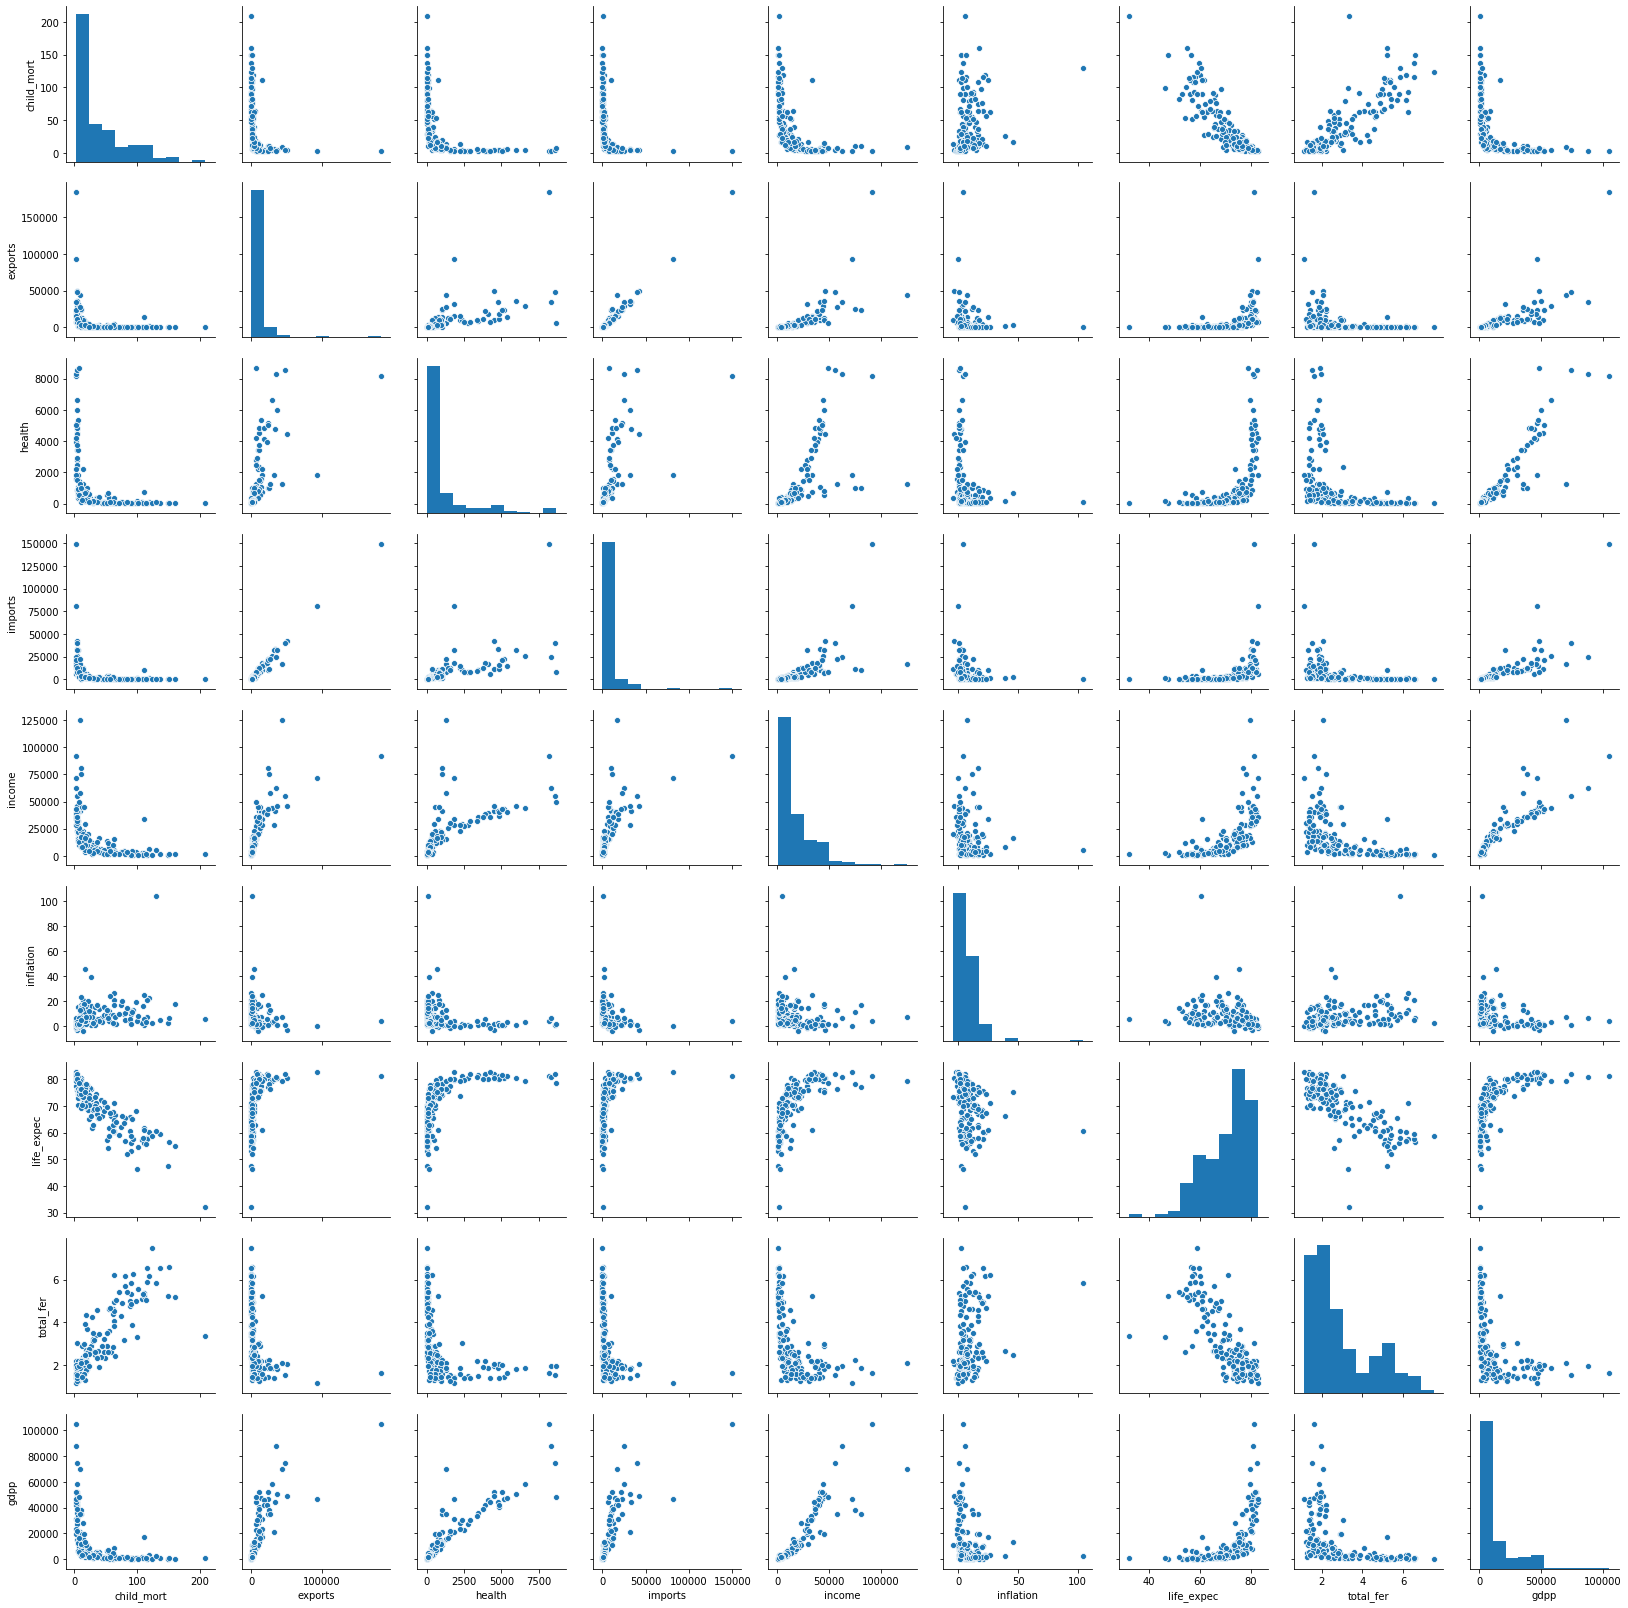

In [16]:
#Let's plot pairplot and see

sns.pairplot(country_df)
plt.show()

Inferences from pair plot :
    
Following variables have linear relationship:
    
1. Child mortality and life expentency,  Child mortality and total_fert
2. Exports and imports 
3. Health and GDP

## Multivariate Analysis

(9.0, 0.0)

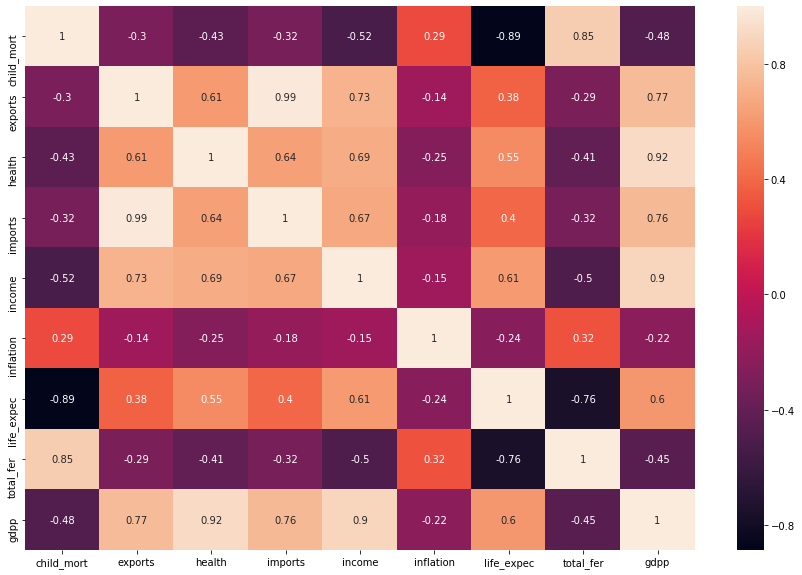

In [17]:
# Heatmap to understand the attributes dependency

plt.figure(figsize = (15,10))        
ax = sns.heatmap(country_df.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [18]:
country_df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


Inferences:

1. Child mortality is strongly negatively correlated with life expectancy
2. Child mortality is negatively correlated with GDP,income also
3. Health is strongly positively correlated with GDP.
4. We can see that GDP and health,income ,exports,imports,life expentency are positively correlated and child mortality,inflation,total fertility are negatively correlated.
5. Child mortality is highly positively correlated with total fertility.
6. Exports and imports have highest positive correlation

**So we can conclude that, underdeveloped countries will have low GDP.As GDP and health are highly correlated, health will be bad and child mortality will be high.**


## OUTLIERS TREATMENT

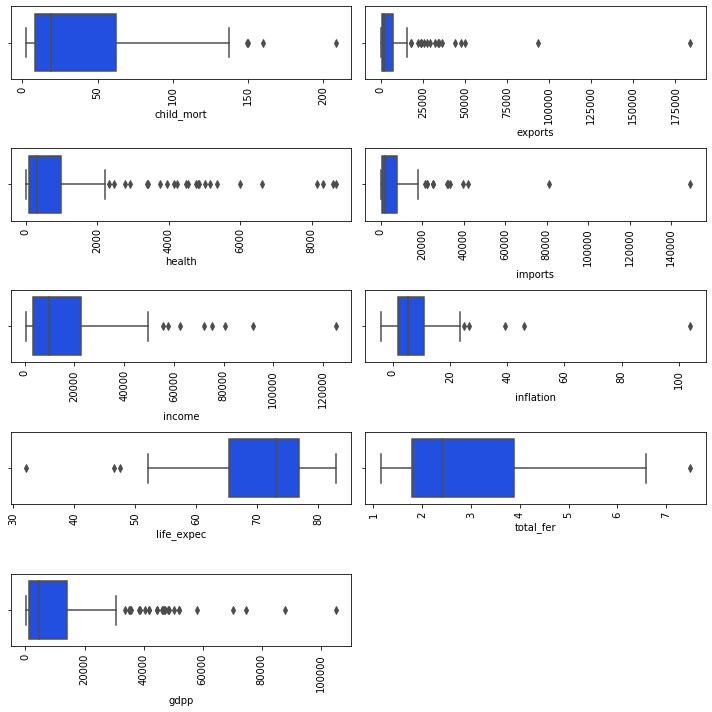

In [19]:
req_cols=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

plt.figure(figsize = (10, 10))
sns.set_palette('bright')
for col in enumerate(req_cols):
    plt.subplot(5, 2, col[0]+1)
    sns.boxplot(x = col[1], data = country_df)
    plt.xticks(rotation = 90)
    plt.tight_layout()

We can see that there are outliers in data. But let's not drop them.

Let's cap the outliers.

For child mortality let's not cap the higher range ouliers. For remaining columns let's not cap lower range outliers

In [20]:
first_percentile = country_df['child_mort'].quantile(0.01)   ## capping lower range outliers for 'child_mort'
country_df['child_mort'][country_df['child_mort'] <= first_percentile] = first_percentile  

In [21]:
req_cols=['exports','health','imports','income','inflation','life_expec','total_fer','gdpp'] 

for col in req_cols:
    percentiles = country_df[col].quantile(0.99)  ## capping higher range outliers
    country_df[col][country_df[col] >= percentiles] = percentiles
    
  

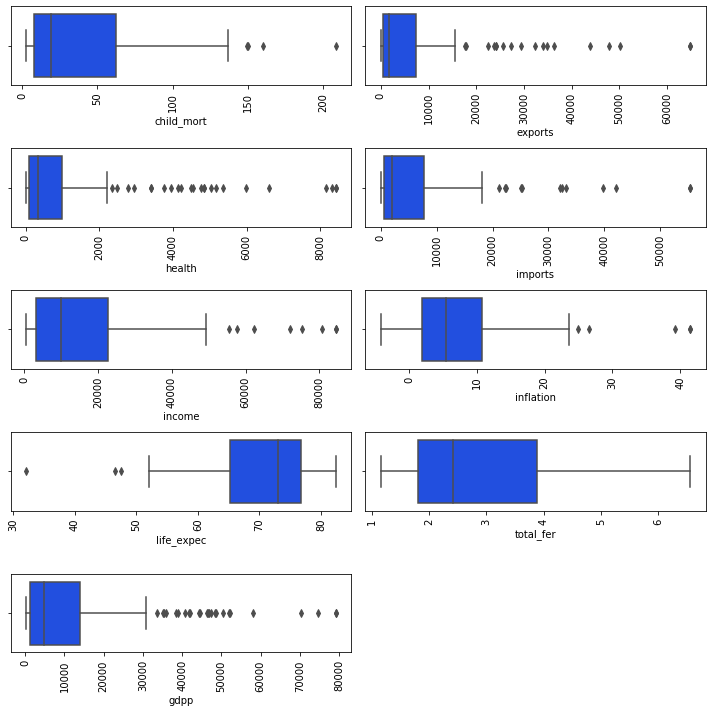

In [22]:
req_cols=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

plt.figure(figsize = (10, 10))
sns.set_palette('bright')
for col in enumerate(req_cols):
    plt.subplot(5, 2, col[0]+1)
    sns.boxplot(x = col[1], data = country_df)
    plt.xticks(rotation = 90)
    plt.tight_layout()

# HOPKINS TEST 


Let's use external library pyclusterend as well as function to find

## Using External library "pyclusterend"

pyclustertend is a python package specialized in cluster tendency. Cluster tendency consist to assess if clustering algorithms are relevant for a dataset.

In [23]:
from pyclustertend import hopkins

help(hopkins)


Help on function hopkins in module pyclustertend.hopkins:

hopkins(data_frame, sampling_size)
    Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16



In [24]:
new_df= country_df.copy()
country = new_df.pop('country')

In [25]:
for i in range(0,10) :
    print(round(hopkins(new_df,150),2))

0.11
0.11
0.11
0.11
0.11
0.1
0.1
0.1
0.11
0.1


From above help, we can see that **a score tending to 0 express a high cluster tendency.**

**We executed 10 times to check score and we got near 0.1 mostly. So there is high cluster tendency**

## Using function

The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set.It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed. A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

In [26]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins_test(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [31]:
## Let's run hopkins test for 10 times and take average score and see. 

hopkins.result=[]

for i in range(0,10) :
    print(round(hopkins_test(new_df),2))
    hopkins.result.append((round(hopkins_test(new_df),2)))
    
print(np.mean(hopkins.result))

0.93
0.9
0.89
0.93
0.88
0.87
0.92
0.95
0.94
0.9
0.9250000000000002


In [32]:
print("Hopkin score for given dataset: " ,round(np.mean(hopkins.result),2))

Hopkin score for given dataset:  0.93


From both the above method, we got good hopkins score. So there is **high cluster tendency** in the given dataset

# SCALING

In [33]:
# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(new_df)
rfm_df_scaled.shape

(167, 9)

In [34]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = new_df.columns
rfm_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


# K-Means Clustering

We would perform following steps :
    
1. Finding the Optimal Number of Clusters using both Elbow and Silhouette score
2. Run K-Means with the choosen K
3. Visualise the cluster.
4. Cluster Profiling using "gdpp,child_mort and income"
5. Listing underdeveloped countries that are in the direst need of aid. 

## 1. Finding the Optimal Number of Clusters using both Elbow and Silhouette score


### SSD/ELBOW_CURVE

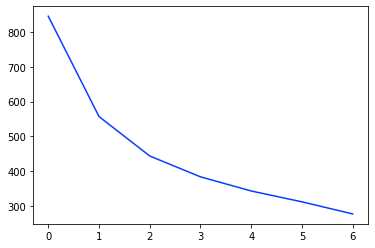

In [35]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

**We can clearly see that there is steep cut or elbow at k=3,4,5.**

## Silhouette score


In [36]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.4693935858809981
For n_clusters=3, the silhouette score is 0.40354406834617873
For n_clusters=4, the silhouette score is 0.39198304727104893
For n_clusters=5, the silhouette score is 0.394620831144723
For n_clusters=6, the silhouette score is 0.29705573347607156
For n_clusters=7, the silhouette score is 0.3067384093954371
For n_clusters=8, the silhouette score is 0.32030956880308137


Again,we can see that 3,4,5 seems to be optimal number of clusters.

In such cases choosing less k is more appropriate.

**So let's choose 3 as the optimal number of clusters**

## 2.Run K-Means with the choosen K

In [37]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50,random_state=100)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [38]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [39]:
# assign the label
country_df['cluster_id_kmeans'] = kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_kmeans
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


## 3. Visualise the cluster.

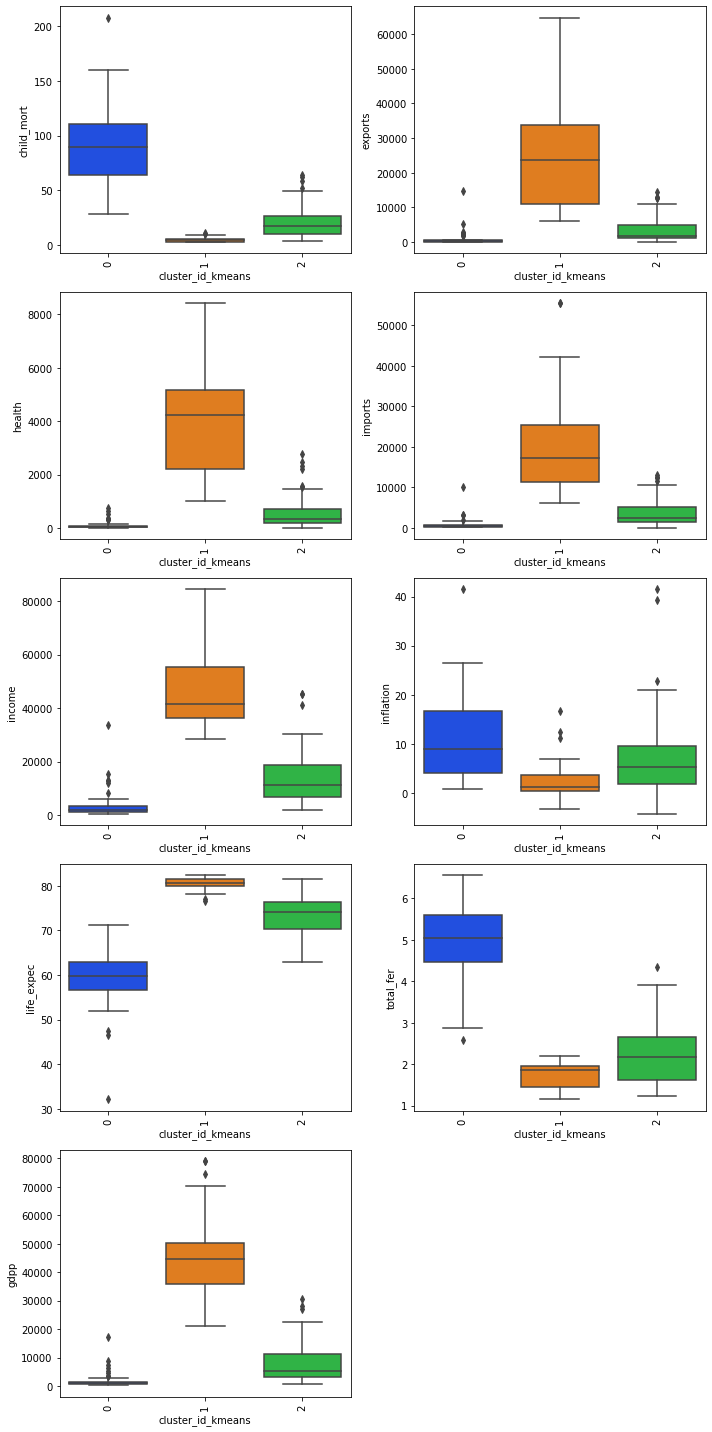

In [40]:
# plot

req_cols=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

plt.figure(figsize = (10, 20))
sns.set_palette('bright')
for col in enumerate(req_cols):
    plt.subplot(5, 2, col[0]+1)
    sns.boxplot(x='cluster_id_kmeans',y = col[1], data = country_df)
    plt.xticks(rotation = 90)
    plt.tight_layout()

Let's visualise the cluster based on 'child_mort','income','gdpp'

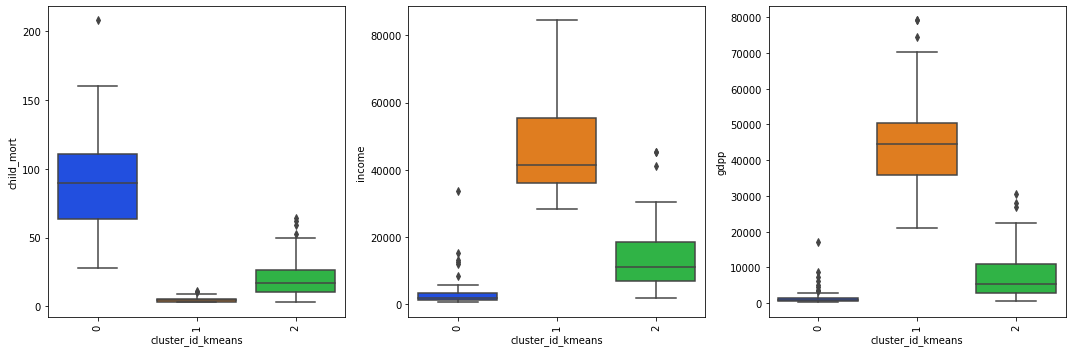

In [41]:
# plot

req_cols=['child_mort','income','gdpp']

plt.figure(figsize = (15, 5))
sns.set_palette('bright')
for col in enumerate(req_cols):
    plt.subplot(1, 3, col[0]+1)
    sns.boxplot(x='cluster_id_kmeans',y = col[1], data = country_df)
    plt.xticks(rotation = 90)
    plt.tight_layout()

## 4. Cluster Profiling using "gdpp,child_mort and income"

We can clearly see that

1. cluster 0 has highest child mortality, lowest income and lowest GDP
2. cluster 1 has lowest  child mortality, highest income and highest GDP
3. cluster 2 has average child mortality, income and  GDP

#### So we have to focus on CLUSTER-0. Cluster-0 are under-developed countries that are in the direst need of aid. 

## 5. Listing underdeveloped countries that are in the direst need of aid. 

In [42]:
country_df['cluster_id_kmeans'].value_counts() ## Checking number of countries in each clusters

2    90
0    48
1    29
Name: cluster_id_kmeans, dtype: int64

In [43]:
countries_kmeans= country_df[country_df['cluster_id_kmeans']==0] ## Filtering cluster-0 countries 

In [44]:
countries_kmeans.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_kmeans
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.8200,553.0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.3600,758.0,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.8800,6350.0,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.1100,1310.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.7500,769.0,0


In [45]:
## Sort the countries on "gdpp,child_mort,income" in ascending,descending,ascending order respectively

countries_kmeans=countries_kmeans.sort_values(by=['gdpp','child_mort','income'],ascending=[True,False,True])

In [46]:
countries_kmeans 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_kmeans
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.470,60.8,5.0200,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,6.5636,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.2000,399.0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.790,60.8,4.6000,413.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.640,54.5,5.5600,419.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.100,53.1,5.3100,459.0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.600,61.7,4.6100,482.0,0


In [47]:
## Eventhough we chose k=3, let's run for k=4 and see if we get any insights.

# Trial model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50,random_state=100)
kmeans.fit(rfm_df_scaled)

kmeans.labels_

# assign the label
country_df['cluster_id_kmeans_4'] = kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_kmeans,cluster_id_kmeans_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,1


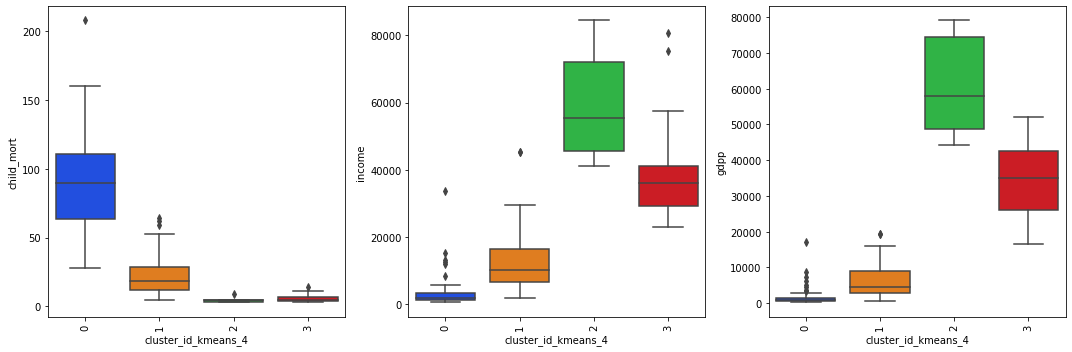

In [48]:
req_cols=['child_mort','income','gdpp']

plt.figure(figsize = (15, 5))
sns.set_palette('bright')
for col in enumerate(req_cols):
    plt.subplot(1, 3, col[0]+1)
    sns.boxplot(x='cluster_id_kmeans_4',y = col[1], data = country_df)
    plt.xticks(rotation = 90)
    plt.tight_layout()

We can clearly see that

1. cluster 0 has highest child mortality, lowest income and lowest GDP



In [49]:
country_df['cluster_id_kmeans_4'].value_counts() ## Checking number of countries in each clusters

1    82
0    48
3    28
2     9
Name: cluster_id_kmeans_4, dtype: int64

Again for k=4, we got 48 countries in under developed countries clusters as we got for k=3

**So we can go with K=3 itself**

In [50]:
## Dropping "cluster_id_kmeans_4" to avoid confusions.

country_df.drop('cluster_id_kmeans_4',axis=1,inplace=True)

In [51]:
country_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_id_kmeans'],
      dtype='object')

# Hierarchical Clustering

We will perform below mentioned steps:
    
1. We will use both single and complete linkage.
2. Choose one method based on the results.
3. Visualise the cluster.
4. Cluster Profiling using "gdpp,child_mort and income"
5. Listing top 5 under developed countries that are in the direst need of aid. 

In [52]:
rfm_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


## 1. We will use both single and complete linkage.

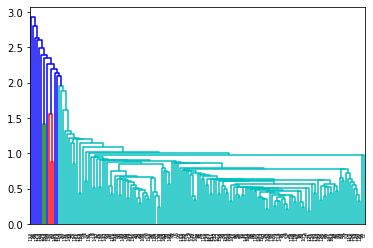

In [53]:
# single linkage
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

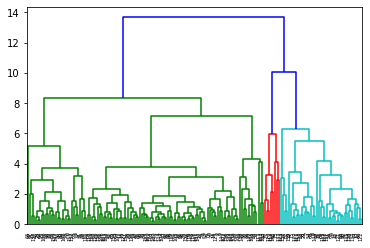

In [54]:
# complete linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

## 2. Choose one method based on the results.

We can clearly see that complete linkage give proper clustering than single clustering. 

So we go with **COMPLTETE LINKAGE**.

From the above dendrogram of complete linkage,I feel if we choose number of clusters as 4, it will be appropriate

Let's once check for 3 clsuters and finalize which is better

In [55]:
# 3 clusters
cluster_labels_HC = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels_HC

# assign the label
country_df['cluster_id_HC_3'] = cluster_labels_HC
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_kmeans,cluster_id_HC_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,1


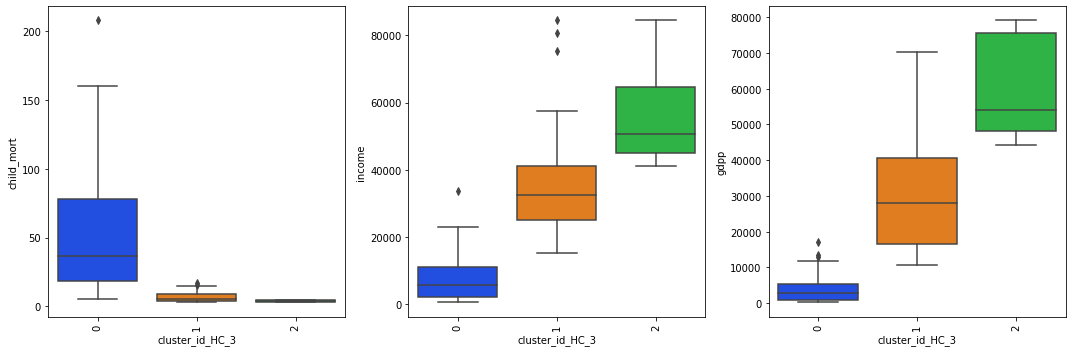

In [56]:
# plot

req_cols=['child_mort','income','gdpp']

plt.figure(figsize = (15, 5))
sns.set_palette('bright')
for col in enumerate(req_cols):
    plt.subplot(1, 3, col[0]+1)
    sns.boxplot(x='cluster_id_HC_3',y = col[1], data = country_df)
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [57]:
country_df['cluster_id_HC_3'].value_counts()

0    118
1     41
2      8
Name: cluster_id_HC_3, dtype: int64

We can clearly see that

1. cluster 0 has highest child mortality, lowest income and lowest GDP
2. cluster 2 has lowest  child mortality, highest income and highest GDP
3. cluster 1 has average child mortality, income and  GDP

#### So we have to focus on CLUSTER-0. Cluster-0 are under-developed countries that are in the direst need of aid. 

### But there are 118 countries in cluster 0 .So 3 clusters is not right choice.Let choose number of clusters as 4

In [58]:
## Dropping " cluster_id_HC_3" to avoid confusions.

country_df.drop('cluster_id_HC_3',axis=1,inplace=True)

In [59]:
country_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_id_kmeans'],
      dtype='object')

## Final model for Hierarchical Clustering with number of clusters 4

In [60]:
# 4 clusters
cluster_labels_HC = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels_HC

array([0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 3, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 2,
       3, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 1, 3, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0,
       0, 2, 2, 3, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       3, 2, 0, 1, 3, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       0, 3, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 3, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0])

In [61]:
# assign the label
country_df['cluster_id_HC'] = cluster_labels_HC
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_kmeans,cluster_id_HC
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,2


## 3. Visualise the cluster.

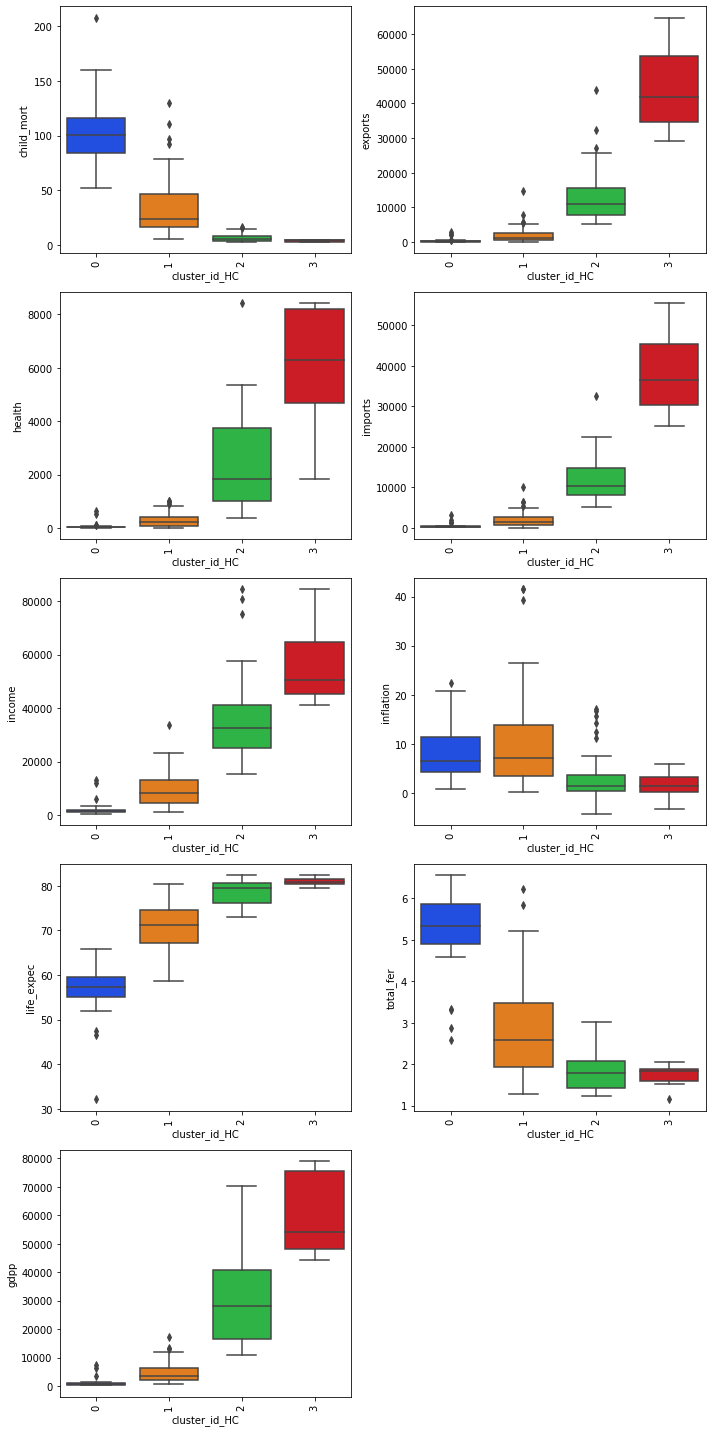

In [62]:
# plot

req_cols=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

plt.figure(figsize = (10, 20))
sns.set_palette('bright')
for col in enumerate(req_cols):
    plt.subplot(5, 2, col[0]+1)
    sns.boxplot(x='cluster_id_HC',y = col[1], data = country_df)
    plt.xticks(rotation = 90)
    plt.tight_layout()

Let's visualise the cluster based on 'child_mort','income','gdpp'

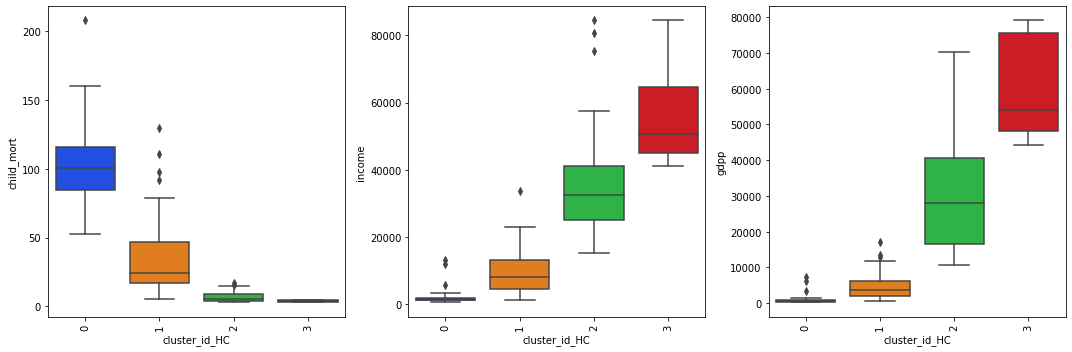

In [63]:
# plot

req_cols=['child_mort','income','gdpp']

plt.figure(figsize = (15, 5))
sns.set_palette('bright')
for col in enumerate(req_cols):
    plt.subplot(1, 3, col[0]+1)
    sns.boxplot(x='cluster_id_HC',y = col[1], data = country_df)
    plt.xticks(rotation = 90)
    plt.tight_layout()

## 4. Cluster Profiling using "gdpp,child_mort and income"

In [64]:
country_df['cluster_id_HC'].value_counts() ## Checking number of countries in each clusters

1    88
2    41
0    30
3     8
Name: cluster_id_HC, dtype: int64

We can clearly see that

1. cluster 0 has highest child mortality, lowest income and lowest GDP
2. cluster 1 has 2nd high  child mortality, low income and low GDP
3. cluster 2 has low child mortality, high income and high GDP
4. cluster 3 has lowest child mortality,highest income and highest GDP

#### So we have to focus on CLUSTER-0. Cluster-0 are under-developed countries that are in the direst need of aid. 

## 5. Listing  underdeveloped countries that are in the direst need of aid. 

In [65]:
countries_HC= country_df[country_df['cluster_id_HC']==0] ##Filtering the countries from cluster 0

In [66]:
countries_HC=countries_HC.sort_values(by=['gdpp','child_mort','income'],ascending=[True,False,True])

In [67]:
countries_HC

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_kmeans,cluster_id_HC
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.470,60.8,5.0200,327.0,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0,0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,6.5636,348.0,0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.2000,399.0,0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.790,60.8,4.6000,413.0,0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.640,54.5,5.5600,419.0,0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.100,53.1,5.3100,459.0,0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.600,61.7,4.6100,482.0,0,0


 # Country identification

In [68]:
print(countries_kmeans.shape)
print(countries_HC.shape)

(48, 11)
(30, 12)


In [69]:
countries_kmeans

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_kmeans
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.470,60.8,5.0200,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,6.5636,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.2000,399.0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.790,60.8,4.6000,413.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.640,54.5,5.5600,419.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.100,53.1,5.3100,459.0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.600,61.7,4.6100,482.0,0


In [70]:
countries_HC

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_kmeans,cluster_id_HC
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.470,60.8,5.0200,327.0,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0,0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,6.5636,348.0,0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.200,55.0,5.2000,399.0,0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.790,60.8,4.6000,413.0,0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.640,54.5,5.5600,419.0,0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.100,53.1,5.3100,459.0,0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.600,61.7,4.6100,482.0,0,0


We got 48 countries as under developed countries in K-means and 30 countries in Hierachial clustering.

Commom countries (sorted in gdpp is ascending, child_mort in descending and income in ascending) :

1.  Burundi
2.  Liberia
3.  Congo, Dem. Rep.
4.  Niger
5.  Sierra Leone
6.  Madagascar
7.  Mozambique
8.  Central African Republic
9.  Malawi
10. Eritrea
11. Togo
12. Guinea-Bissau
13. Afghanistan
14. Gambia
15. Burkina Faso
16. Uganda
17. Guinea
18. Haiti
19. Tanzania
20. Mali
21. Benin
22. Comoros
23. Chad
24. Lesotho
25. Cote d'Ivoire
26. Cameroon
27. Zambia
28. Angola
29. Botswana
30. South Africa



The extra countries predicted by k-means:

1. Rwanda
2. Kenya
3. Senegal
4. Pakistan
5. Lao
6. Mauritania
7. Solomon Islands
8. Ghana
9. Yemen
10. Sudan
11. Kiribati
12. Nigeria
13. Congo, Rep.
14. Timor-Leste
15. Iraq
16. Namibia
17. Gabon
18. Equatorial Guinea


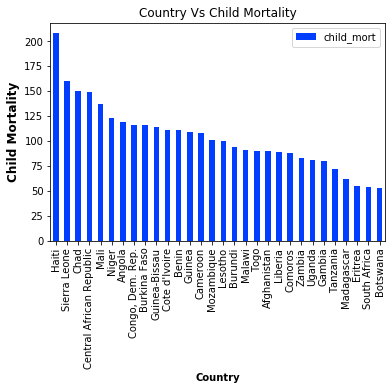

In [71]:
# BarPlot for Child Mortality of countries which are in need of aid predicted by Hierarchical Clustering

child_mort_df1= pd.DataFrame(countries_HC.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
child_mort_df1.plot.bar()
plt.title('Country Vs Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

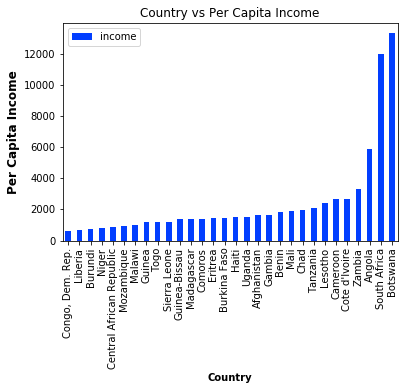

<Figure size 432x288 with 0 Axes>

In [72]:
# BarPlot for Per Capita Income of countries which are in need of aid predicted by Hierarchical Clustering

income_df1 = pd.DataFrame(countries_HC.groupby(['country'])['income'].mean().sort_values(ascending = True))
income_df1.plot.bar()
plt.title('Country vs Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()
plt.tight_layout()


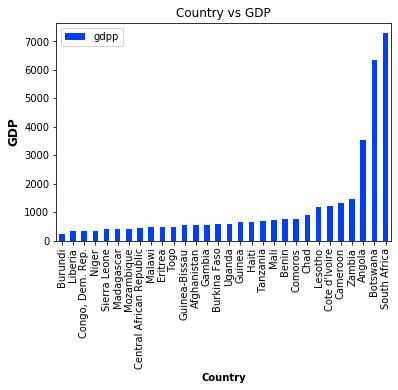

In [73]:
# BarPlot for GDP of countries which are in need of aid predicted by Hierarchical Clustering

gdp_df1 = pd.DataFrame(countries_HC.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
gdp_df1.plot.bar()
plt.title('Country vs GDP')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP", fontsize = 12, fontweight = 'bold')
plt.show()

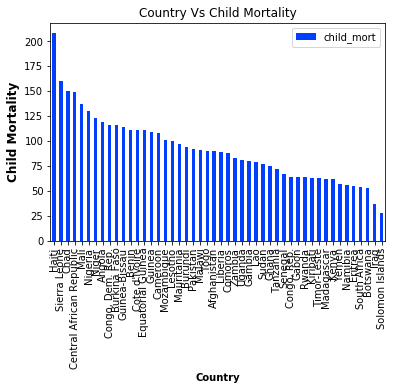

In [74]:
# BarPlot for Child Mortality of countries which are in need of aid predicted by K-Means

child_mort_df2= pd.DataFrame(countries_kmeans.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
child_mort_df2.plot.bar()
plt.title('Country Vs Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')


plt.show()

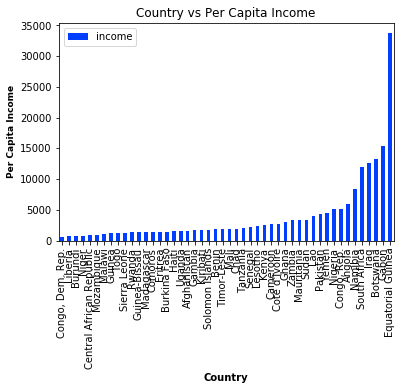

<Figure size 432x288 with 0 Axes>

In [75]:
# BarPlot for Per Capita Income of countries which are in need of aid predicted by K-Means

income_df2 = pd.DataFrame(countries_kmeans.groupby(['country'])['income'].mean().sort_values(ascending = True))
income_df2.plot.bar()
plt.title('Country vs Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 9, fontweight = 'bold')
plt.show()
plt.tight_layout()

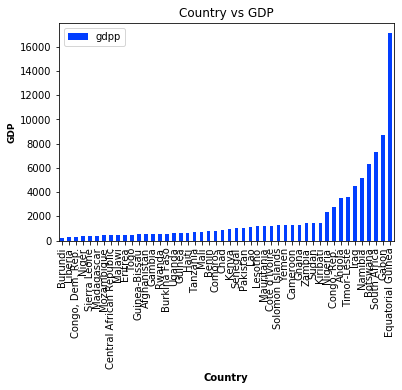

<Figure size 432x288 with 0 Axes>

In [76]:
# BarPlot for GDP of countries which are in need of aid predicted by K-Means

gdp_df2 = pd.DataFrame(countries_kmeans.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
gdp_df2.plot.bar()
plt.title('Country vs GDP')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP", fontsize = 9, fontweight = 'bold')
plt.show()
plt.tight_layout()

From all the above graphs , the final countries are as follows:

1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea
11. Togo
12. Guinea-Bissau
13. Afghanistan
14. Gambia
15. Rwanda
16. Burkina Faso
17. Uganda
18. Guinea
19. Haiti
20. Tanzania
21. Mali
22. Benin
23. Comoros
24. Chad


__________________________________________________________________________________________________________________